# Embedding Visualization of Patient Survival Outcomes

To better understand the distribution patterns of patients who survived versus those who expired within 30 days, we employed dimensionality reduction techniques to create visual embeddings. This approach allowed us to explore potential clustering and separation patterns between the two groups based on high-dimensional feature data.

We used two embedding techniques: TSNE and kernelPCA. As our dataset to analyze contains over 15000 samples with over 50 features, to reduce cost of computation, we randomly sampled 3000 patients to perform our visualization.

In [ ]:
import pandas as pd
import numpy as np
import os
import openTSNE
from sklearn.manifold import TSNE,LocallyLinearEmbedding,MDS
from sklearn.decomposition import PCA,KernelPCA

data=pd.read_csv("all_patients_data_modified.csv")
clean_data=pd.read_csv("all_patients_data_cleaned.csv")

# Data with outlier

In [104]:
expire_label=data["HOSPITAL_EXPIRE_FLAG"].to_numpy()
data=data.drop(columns=["SUBJECT_ID","HADM_ID","ICUSTAY_ID"	,"LOS_HOSPITAL","LOS_ICU","HOSPITAL_EXPIRE_FLAG"])

from sklearn.preprocessing import StandardScaler
data_std=StandardScaler(with_std=True).fit_transform(data)

np.random.seed(505)
sample_id=np.random.randint(data_std.shape[0],size=1500)
sampled_data=data_std[sample_id]
expire_label=expire_label[sample_id]

In [105]:
sample_affinities = openTSNE.affinity.PerplexityBasedNN(
    sampled_data,
    perplexity=500,
    n_jobs=-1,
    random_state=0,
    verbose=True,
)

sample_init = openTSNE.initialization.pca(sampled_data, random_state=42)

sample_embedding = openTSNE.TSNE(n_jobs=-1, verbose=True,exaggeration=1).fit(affinities=sample_affinities, initialization=sample_init)

===> Finding 1499 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 0.88 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.73 seconds
--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, exaggeration=1, n_jobs=-1, verbose=True)
--------------------------------------------------------------------------------
===> Running optimization with exaggeration=12.00, lr=125.00 for 250 iterations...
Iteration   50, KL divergence -2.4688, 50 iterations in 29.8556 sec
Iteration  100, KL divergence -0.9650, 50 iterations in 18.0466 sec
Iteration  150, KL divergence -0.9989, 50 iterations in 17.4571 sec
Iteration  200, KL divergence -0.1497, 50 iterations in 16.1476 sec
Iteration  250, KL divergence -2.4804, 50 iterations in 16.2741 sec
   --> Time elapsed: 97.78 seconds
===> Running optimization with exaggeration=1.00, lr=1500.00 for 500 iterations...
Iteration   50, KL divergence

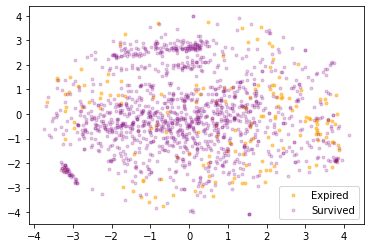

In [108]:
import matplotlib.pyplot as plt
plt.scatter(sample_embedding[expire_label==1,0],sample_embedding[expire_label==1,1],c='orange',alpha=0.5,marker='.',label='Expired')
plt.scatter(sample_embedding[expire_label==0,0],sample_embedding[expire_label==0,1],c='purple',alpha=0.2,marker='.',label='Survived')
plt.legend()
plt.savefig("TSNE_withoutliers.pdf")

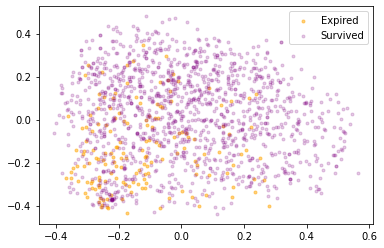

In [107]:
KPCA_transformer = KernelPCA(n_components=2, kernel='rbf')
dataKPCA = KPCA_transformer.fit_transform(sampled_data)
plt.scatter(dataKPCA[expire_label==1,0],dataKPCA[expire_label==1,1],c='orange',alpha=0.5,marker='.',label='Expired')
plt.scatter(dataKPCA[expire_label==0,0],dataKPCA[expire_label==0,1],c='purple',alpha=0.2,marker='.',label='Survived')
plt.legend()
plt.savefig("KPCA_withoutliers.pdf")

# Data without outlier

In [99]:
expire_label=clean_data["EXPIRE_FLAG_30D"].to_numpy()
clean_data=clean_data.drop(columns=["SUBJECT_ID","HADM_ID","ICUSTAY_ID"	,"LOS_HOSPITAL","LOS_ICU","EXPIRE_FLAG_30D","HOSPITAL_EXPIRE_FLAG"])

from sklearn.preprocessing import StandardScaler
data_std=StandardScaler(with_std=True).fit_transform(clean_data)

np.random.seed(505)
sample_id=np.random.randint(data_std.shape[0],size=3000)
sampled_data=data_std[sample_id]
expire_label=expire_label[sample_id]

In [82]:
sample_affinities = openTSNE.affinity.PerplexityBasedNN(
    sampled_data,
    perplexity=500,
    n_jobs=-1,
    random_state=0,
    verbose=True,
)

sample_init = openTSNE.initialization.pca(sampled_data, random_state=42)

sample_embedding = openTSNE.TSNE(n_jobs=-1, verbose=True,exaggeration=1).fit(affinities=sample_affinities, initialization=sample_init)

===> Finding 1500 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 1.94 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 1.50 seconds
--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, exaggeration=1, n_jobs=-1, verbose=True)
--------------------------------------------------------------------------------
===> Running optimization with exaggeration=12.00, lr=250.00 for 250 iterations...
Iteration   50, KL divergence -1.2015, 50 iterations in 71.9833 sec
Iteration  100, KL divergence -4.8414, 50 iterations in 10.9506 sec
Iteration  150, KL divergence -5.3523, 50 iterations in 3.3530 sec
Iteration  200, KL divergence 1.5557, 50 iterations in 1.9267 sec
Iteration  250, KL divergence 1.5557, 50 iterations in 1.2424 sec
   --> Time elapsed: 89.46 seconds
===> Running optimization with exaggeration=1.00, lr=3000.00 for 500 iterations...
Iteration   50, KL divergence 1.04

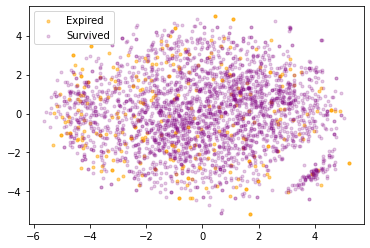

In [92]:
import matplotlib.pyplot as plt
plt.scatter(sample_embedding[expire_label==1,0],sample_embedding[expire_label==1,1],c='orange',alpha=0.5,marker='.',label='Expired')
plt.scatter(sample_embedding[expire_label==0,0],sample_embedding[expire_label==0,1],c='purple',alpha=0.2,marker='.',label='Survived')
plt.legend()
plt.savefig("TSNE_excludeoutliers.pdf")

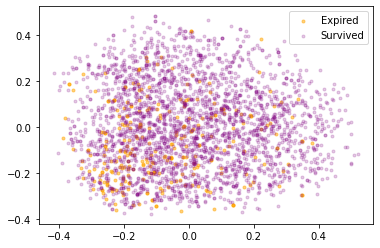

In [93]:
KPCA_transformer = KernelPCA(n_components=2, kernel='rbf')
dataKPCA = KPCA_transformer.fit_transform(sampled_data)
plt.scatter(dataKPCA[expire_label==1,0],dataKPCA[expire_label==1,1],c='orange',alpha=0.5,marker='.',label='Expired')
plt.scatter(dataKPCA[expire_label==0,0],dataKPCA[expire_label==0,1],c='purple',alpha=0.2,marker='.',label='Survived')
plt.legend()
plt.savefig("KPCA_excludeoutliers.pdf")

Unfortunately, we do not observe significant distribution shift for expired patients and survived patients on our embedded feature space.